## Your Name: Sunint Bindra

## Your Collaborator's Name: Joshua Ackerman

# Assignment 6. Deep Learning and TensorFlow

In this homework, we will train a neural network to predict if a credit card transaction is fraudulent or genuine. We will use the dataset from Assignment 4 and TensorFlow or Keras.

### Data

For this homework, you will use the dataset from Assignment 4:
- Credit Card Fraud Detection: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

### References

- Chapter 18 in Data Science from Scatch.
- [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/)
- [Keras: The Python Deep Learning library](https://keras.io)


## Problem 1 (TensorFlow or Keras)

This is not a graded problem. You can choose using TensorFlow or Keras in this assignment. Keras is a high-level python neural netoworks API that runs on top of TensorFlow, CNTK, or Theano. You can choose to use either TensorFlow or Keras for this assignment. Please specify which library you use.

<!-- If you are going to use TensorFlow, follow the instructions in [here](https://www.tensorflow.org/install/) to install TensorFlow on your computer. Otherwise follow the instructions in [here](https://keras.io/#installation) to install Keras. -->


In [ ]:
import keras

### Your choice is:



Keras

## Problem 2 Train neural network

In this problem, you will design and implement your neural network for fruad detection. The input features are V1 to V28. The minimum requirement for the network is that it should have at least one hidden layer and one output layer. All layers are fully connected. Since it is a binary classification problem, the output layer would have only one neuron with sgmoid activation. 

#### ["Since it is a binary classification, using sigmoid is same as softmax. For multi-class classification use sofmax with cross-entropy."](https://medium.com/aidevnepal/for-sigmoid-funcion-f7a5da78fec2) 

You will make the following decisions:
1. the number of hidden layers (1 minimum).
2. the number of neurons for each hidden layer.
3. the activation function (e.g., sigmoid, ReLU, tanh) and batch size.
4. regularizations (e.g., batch normalization, dropout)
5. the loss function, metrics, and optimizer
6. training strategy. (e.g., pretraining, distillation)


## Using convolutional networks or recurrent networks (e.g., LSTM, GRU) will have bonus points. However, they should be added in a correct manner.

### Q1 Describe your neural network (10 pts)

Please specify the following:

0. what is the input dimensions? I.e., How many inputs does your network have?
1. the number of hidden layers
2. the number of neurons for each hidden layer.
3. the activation function (e.g., sigmoid, ReLU, tanh) and batch size.
4. regularizations (e.g., batch normalization on different hidden layers, dropout with different rates).
5. the loss function, metrics and optimizer.
6. what is your training strategy? (e.g., pretraining, distillation)

### You could try pretraining and fine-tuning (e.g., autoencoder).

#### Your answer:


0. Inputs V1 to V28, plus to others (total of 30) input layers
1. 7 hidden layers, 1-vector layer, CNN layer with 5 filters, max-pooling layer, dense layer with 7 neurons, final output layer 
2. Refer to 1. 
3. 32 batch size, activation fx of final layer is sigmod, activation fx of hidden layers is ReLU
4. No specific regularization parameteres set, possibly background/fitting is doing that   
5. Adam optimizer is used with loss for binary-cross entropy, metrics is set to accuracy  
6. Training strategy, no pretraining

In [ ]:
import pandas as pd

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
drive.CreateFile({'id': '1--2KTYqptGjsbAIf3-sKFUHWAnvjKXJ6'}).GetContentFile('creditcard.csv')
fraud_data = pd.read_csv('creditcard.csv')

In [ ]:
fraud_data.sample(frac=1).head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123664,77015.0,-1.839882,-0.199824,1.029619,0.389045,1.277865,1.665120,-0.331760,0.489620,0.191413,0.259450,1.482468,0.599859,-1.084731,0.175231,0.571550,-1.564305,1.110830,-1.766523,-0.004665,-0.757641,-0.074961,0.289104,-0.310511,-1.277282,-0.817759,0.367868,-0.337743,0.285553,57.93,0
146100,87443.0,0.989569,-1.966878,-2.224828,0.547372,-0.177509,-0.175617,0.773222,-0.298852,0.512634,-0.109298,0.030086,0.675546,0.123752,0.643217,-0.039380,0.255197,-1.004507,0.932515,0.254858,0.943675,0.642075,0.748515,-0.680687,-0.886097,0.215825,-0.041106,-0.125057,0.020004,570.00,0
269939,163844.0,1.265892,-1.291747,-1.471104,0.723850,-0.399846,-0.240411,0.127333,-0.131177,0.853295,-0.670114,-0.633034,0.308695,0.664721,-1.276637,0.688764,0.930690,0.254111,0.198333,-0.249329,0.705814,-0.106443,-1.095211,0.065266,0.385148,-0.690047,0.058437,-0.092628,0.057505,399.90,0
264694,161543.0,-1.535476,0.049610,0.809848,-3.556288,0.323349,0.281887,-0.163201,0.660506,-0.718052,-0.787663,-0.606967,0.736636,0.789797,-0.208279,-1.617831,-0.700132,-0.846353,1.375343,-0.517168,-0.533343,-0.835382,-1.916531,0.135811,-0.401227,0.532137,0.173895,-0.004687,-0.009374,1.93,0
129001,78918.0,-1.004427,1.087976,0.819788,-0.439847,0.852683,1.477020,0.114806,0.805467,-0.030446,0.133540,1.932463,0.069554,-1.539000,0.036894,1.508129,-0.561102,0.914032,-1.323897,-1.277119,0.144537,-0.194828,-0.313484,0.087540,-1.445211,-0.414046,0.218070,0.519651,0.184620,0.99,0


### Q2 Train and Evaluate the First Model (50 pts)

Write code to define your neural network model. Split the data into training and test sets. Use stratified K-fold cross-validation or a separate validation set to tune hyperparameters (e.g., batch size, acitivation function, dropout rate, loss function, optimizer). Evaluate the performance of the model on the test set. Display learning curves (i.e., loss result after training each batch) for both training and validation sets.

### You must write a complete training pipeline with all of the 6 steps listed above included.

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 28, 5)             20        
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 5)             0         
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 5)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 8         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


None

Train on 170884 samples, validate on 42721 samples
Epoch 1/10
170884/170884 [==============================] - 10s 58us/step - loss: 13.5812 - accuracy: 0.9967 - val_loss: 0.4500 - val_accuracy: 0.9982
Epoch 2/10
170884/170884 [==============================] - 10s 57us/step - loss: 0.4757 - accuracy: 0.9979 - val_loss: 0.0206 - val_accuracy: 0.9983
Epoch 3/10
170884/170884 [==============================] - 10s 57us/step - loss: 0.3539 - accuracy: 0.9980 - val_loss: 0.0132 - val_accuracy: 0.9983
Epoch 4/10
170884/170884 [==============================] - 10s 57us/step - loss: 0.1599 - accuracy: 0.9980 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 5/10
170884/170884 [==============================] - 10s 57us/step - loss: 0.0942 - accuracy: 0.9980 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 6/10
170884/170884 [==============================] - 10s 57us/step - loss: 0.0522 - accuracy: 0.9981 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 7/10
170884/170884 [======================

[0.012732264345454452, 0.9982725381851196]

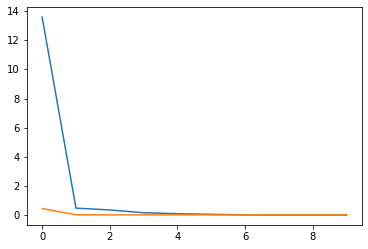

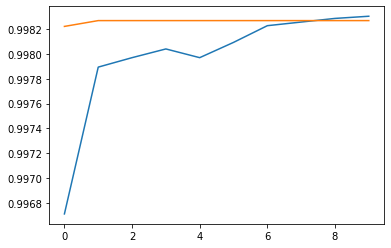

In [ ]:
# imports 
import numpy as np
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Make X, y by dropping or selecting column
X = fraud_data.drop('Class', axis = 1, inplace = False).to_numpy()
y = fraud_data["Class"].to_numpy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make Network
filters = 5
kernel_size = 3
epochs = 10
batch_size = 32
validation_split = 0.2

input_size = (len(X_train[0]), 1)
# Describe model type 
model = Sequential()

# Adding 1D convolutional layer, dropout rate, max pooling fx, and dense layers
model.add(Conv1D(filters, kernel_size, padding = "valid", activation = "relu",
          input_shape = input_size))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Configuring training model 
model.compile(loss = "binary_crossentropy", optimizer = "Adam", 
              metrics = ["accuracy"])

# Display model shape and parameters 
display(model.summary())

# Training the model with validation set
X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

history = model.fit(X_train, y_train, epochs = epochs, 
          batch_size = batch_size, 
          validation_split = validation_split)

display(model.evaluate(X_test, y_test))

# Display plots of loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()


### Q3 Evaluate a Simpler Network (15 pts)

Now reduce your model's complexity and evalaute the reduced model. Display learning curves too. If your model has only 1 hidden layer, you can reduce the number of neurons. If your model has more than 1 hidden layer, you can also try removing one hidden layer. Or, increasing the kernel size or stride if you have convolutional layers.

Reducing the model complexity helps reducing over-fitting. 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 28, 3)             12        
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 3)             0         
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 3)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 28        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 8         
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


None

Train on 170884 samples, validate on 42721 samples
Epoch 1/10
170884/170884 [==============================] - 9s 53us/step - loss: 2.9430 - accuracy: 0.9896 - val_loss: 0.2001 - val_accuracy: 0.9983
Epoch 2/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.2328 - accuracy: 0.9976 - val_loss: 0.3470 - val_accuracy: 0.9983
Epoch 3/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.2189 - accuracy: 0.9978 - val_loss: 0.1474 - val_accuracy: 0.9983
Epoch 4/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.1491 - accuracy: 0.9976 - val_loss: 0.0585 - val_accuracy: 0.9983
Epoch 5/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.1601 - accuracy: 0.9976 - val_loss: 0.0442 - val_accuracy: 0.9983
Epoch 6/10
170884/170884 [==============================] - 9s 52us/step - loss: 0.1560 - accuracy: 0.9976 - val_loss: 0.0563 - val_accuracy: 0.9983
Epoch 7/10
170884/170884 [=============================

[0.1933126003073555, 0.9982444047927856]

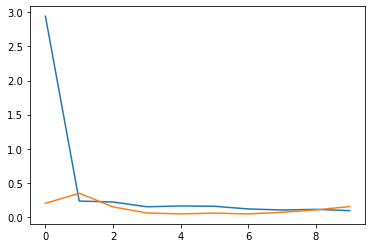

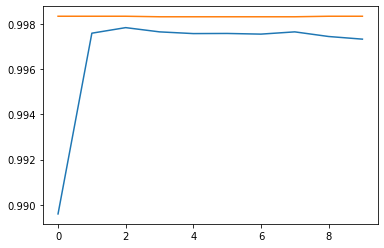

In [ ]:
filters_simple = 3
kernel_size_simple = 3

input_size = (len(X_train[0]), 1)
# Describing model type
model_simple = Sequential()

# Adding 1D convolutional layer, dropout rate, max pooling fx, and dense layers
model_simple.add(Conv1D(filters_simple, kernel_size_simple, padding = "valid", 
                        activation = "relu", input_shape = input_size))
model_simple.add(Dropout(0.6))
model_simple.add(GlobalMaxPooling1D())
model_simple.add(Dense(7, activation = "relu")) 
model_simple.add(Dense(1, activation = "sigmoid"))

# Configuring training model 
model_simple.compile(loss = "binary_crossentropy", optimizer = "Adagrad", 
              metrics = ["accuracy"])

# Display model shape and parameters 
display(model_simple.summary())

# Training the model with validation set
history = model_simple.fit(X_train, y_train, epochs = epochs, 
          batch_size = batch_size, 
          validation_split = validation_split)

display(model_simple.evaluate(X_test, y_test))

# Display plots of loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

### Q4 Evaluate a More Complex Network (25 pts)

Now increase your model's complexity and evalaute the larger model. Display learning curves too. Don't forget to more regularize it in order to avoid overfitting. You can increase your model complexity by increasing the number of neurons in the hidden layers or adding more hidden layers to the network.

Increasing the model complexity helps reducing under-fitting. 

In [ ]:
# !!!Your code!!!

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 26, 8)             48        
_________________________________________________________________
global_max_pooling1d_22 (Glo (None, 8)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 14)                126       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 15        
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


None

Train on 170884 samples, validate on 42721 samples
Epoch 1/10
170884/170884 [==============================] - 9s 55us/step - loss: 1.8459 - accuracy: 0.9944 - val_loss: 0.0545 - val_accuracy: 0.9933
Epoch 2/10
170884/170884 [==============================] - 9s 53us/step - loss: 0.2977 - accuracy: 0.9970 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 3/10
170884/170884 [==============================] - 11s 62us/step - loss: 0.0163 - accuracy: 0.9986 - val_loss: 0.0066 - val_accuracy: 0.9988
Epoch 4/10
170884/170884 [==============================] - 10s 61us/step - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch 5/10
170884/170884 [==============================] - 9s 54us/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0086 - val_accuracy: 0.9985
Epoch 6/10
170884/170884 [==============================] - 9s 54us/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 7/10
170884/170884 [===========================

[0.005459030228058414, 0.9990309476852417]

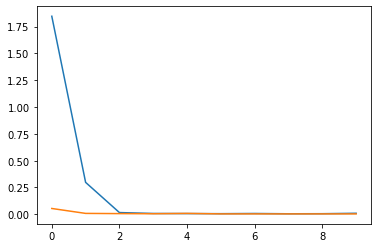

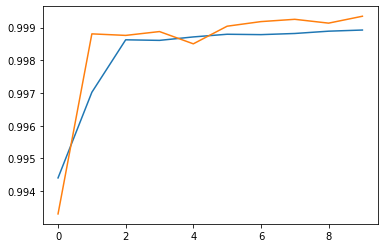

In [ ]:
filters_complex = 8
kernel_size_complex = 5
#Describe model type 
model_complex = Sequential()

# Adding 1D convolutional layer, dropout rate, max pooling fx, and dense layers
model_complex.add(Conv1D(filters_complex, kernel_size_complex, padding = "valid", 
                         activation = "relu", input_shape = input_size))

# Remove drop-out layer
model_complex.add(GlobalMaxPooling1D())

# Double the dense layers
model_complex.add(Dense(14, activation = "relu"))

model_complex.add(Dense(1, activation = "sigmoid"))

model_complex.compile(loss = "binary_crossentropy", optimizer = "Adam", 
              metrics = ["accuracy"])

# Display model parameters 
display(model_complex.summary())

# Training the model with validation set
history = model_complex.fit(X_train, y_train, epochs = epochs, 
          batch_size = batch_size, 
          validation_split = validation_split)

display(model_complex.evaluate(X_test, y_test))

# Display plots of loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()